## Week 1: Introduction and Framing

Creator: Cornelia Paulik <br>
Email: cpaulik@ischool.berkeley.edu <br>

#### ``Readings``

1. Raschka & Mirjalili (RM), 3rd edition: Chapter 1 (pp. 1-17 in the print version of the book).

#### ``Learning objectives``

1. Identify and recall the typical workflow for using Machine Learning in predictive modeling.
2. Read through the commands in this notebook, modify them, and demonstrate your understanding of how the code works by implementing changes.
3. Organize your code to enhance readability and structure, incorporating comprehensive comments to explain your thought process.

#### ``Motivation``

1. Machine learning is an exciting field that can help you turn massive data into knowledge.

2. Use powerful algorithms to learn patterns from data and make predictions about future events.

3. Easy to break into the field, thanks to the many open source libraries (sklearn, tensorflow, etc.)

#### ``Data``

1. Generated using numpy
2. Size = (50, 1)

``Roadmap for building ML systems`` (see Objective 1)

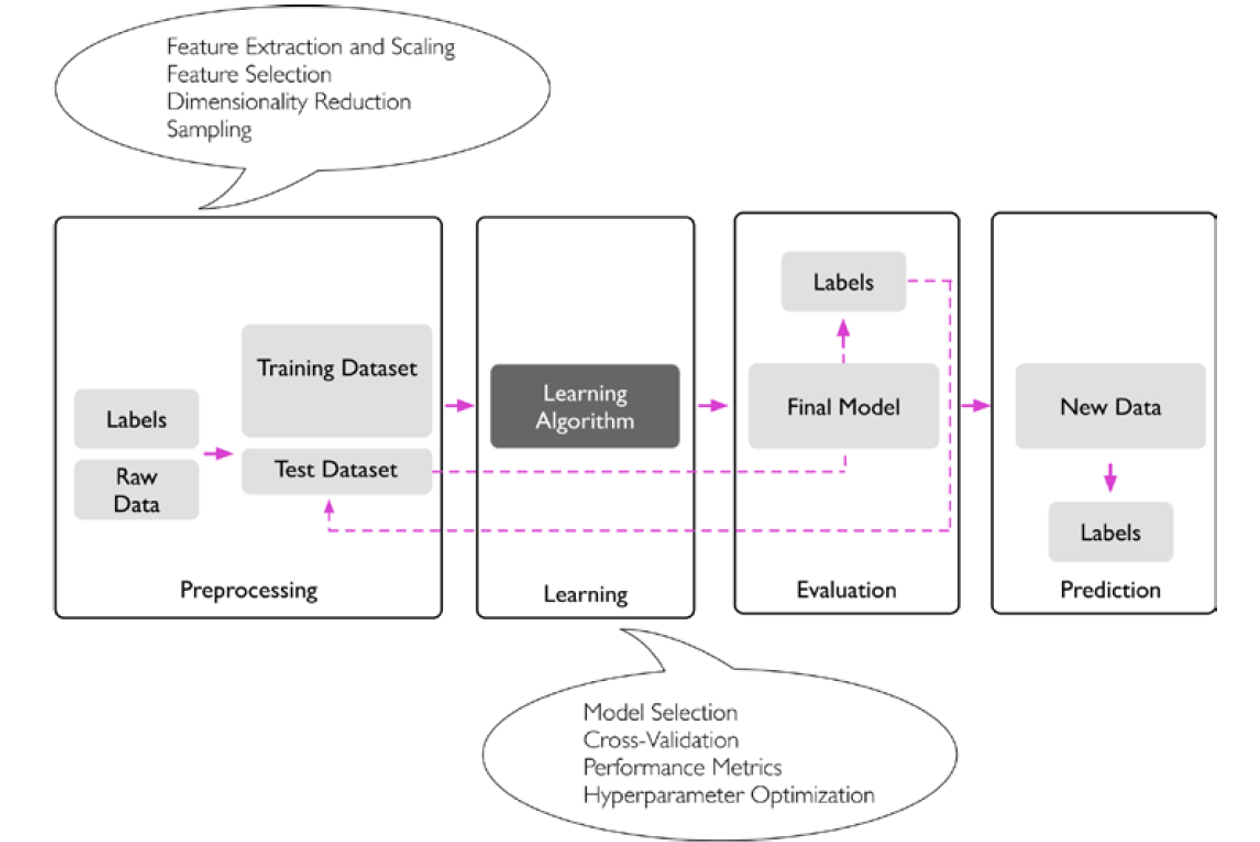

In [6]:
# Image source: S. Raschka and V. Mirjalili, Python Machine Learning
from IPython.display import Image
Image(filename='./images/roadmap_ml_systems.png', width = 600)

---

### Step 1: Import packages

I am using the following package versions:
* Numpy: 1.26.4
* Matplotlib: 3.8.4
* Seaborn: 0.13.2
* Sklearn: 1.4.2
* IPython: 8.25.0

In [3]:
# standard 
import numpy as np

# plots
import matplotlib.pyplot as plt
import seaborn as sb

# images
from IPython.display import Image

# prediction
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# This tells matplolib not to try opening a new window for each plot
%matplotlib inline

# silence warnings
import warnings
warnings.filterwarnings('ignore')

# import os
import os

### Step 2: Set working directories

In [7]:
# set working directory (CHANGE HERE)
chdir=False
if chdir:
    os.chdir('./modules')

### Step 3: Define functions

In [ ]:
# ADD HERE

### Step 4: Read data

This time we will generate our own data, y and X, by using a random number generator.

generate X:

In [9]:
# set a randomizer seeds (this will ensure the results are the same each time)
np.random.seed(100)

# set len(X)
len_X = 50

# generate evenly spaced X values in [0, 1]. Set len(X) = 50
X = np.linspace(0, 1, len_X)

In [11]:
print("Question 1: What is the data type of X?")
print(type(X))
print(X[:10])

Question 1: What is the data type of X?
<class 'numpy.ndarray'>
[0.         0.02040816 0.04081633 0.06122449 0.08163265 0.10204082
 0.12244898 0.14285714 0.16326531 0.18367347]


generate y:

In [12]:
# create a "true" function (a piece of a cosine curve) that we will try to approximate with a model
true_function = lambda x: np.cos(1.5 * np.pi * x)

# try this function out. Notice that you can apply it to a scalar, an array, or you can use it even in pandas
print(true_function(0))
print(true_function(0.5))
print(true_function(np.array([0, 0.5])))

1.0
-0.7071067811865475
[ 1.         -0.70710678]


In [13]:
# generate true y values
y = true_function(X)

# print the values of y to the nearest hundredth
print (['%.2f' %i for i in y[:20]]) # print the first 20 examples

['1.00', '1.00', '0.98', '0.96', '0.93', '0.89', '0.84', '0.78', '0.72', '0.65', '0.57', '0.49', '0.40', '0.32', '0.22', '0.13', '0.03', '-0.06', '-0.16', '-0.25']


In [15]:
# add random noise to y
# the randn function samples random numbers from the standard Normal distribution
# multiplying adjusts the standard deviation of the distribution
noise = np.random.randn(len_X) * 0.2
print(noise)
y += noise

# print the noise-added values of y for comparison.
print (['%.2f' %i for i in y]) # print the first 20 examples

[-0.23760352 -0.10994924 -0.18800923 -0.16558647  0.02177269  0.10156192
 -0.17244547  0.24989395 -0.01592225 -0.1779463  -0.17635968  0.00372779
  0.04756892  0.00270971 -0.32710588 -0.20884198  0.12260778  0.14724104
  0.20538429 -0.28643812 -0.36823766  0.07321865 -0.06635543 -0.1378436
  0.40692151 -0.11014288  0.15009067 -0.26139847  0.11611467 -0.22090462
  0.13802429  0.13737801 -0.31333751  0.18099482  0.15576448  0.08564657
  0.0217744   0.00565673 -0.11576516 -0.23989024 -0.3411904   0.07383279
  0.37531469 -0.07538067  0.36638722  0.00060349 -0.01520469  0.00079152
 -0.03700282 -0.49743031]
['0.41', '0.95', '1.02', '0.74', '1.14', '1.09', '0.71', '0.82', '0.66', '0.52', '0.30', '0.58', '0.34', '0.48', '0.03', '-0.10', '0.05', '0.29', '-0.04', '-0.76', '-0.39', '-0.05', '-0.64', '-0.90', '-0.23', '-0.66', '-0.51', '-0.84', '-0.85', '-1.15', '-0.78', '-1.14', '-1.46', '-0.66', '-0.69', '-0.98', '-0.69', '-1.25', '-1.26', '-1.31', '-1.21', '-0.76', '-0.25', '-0.74', '0.16', '-0

Next, we want to predict y, using the feature vector X. 

In this course, our outputs (y) will always be 1-dimensional. Our inputs (X) will usually have more than 1 dimension. Today, for simplicity, we have just a single feature. 

Since the machine learning classes in sklearn expect input feature vectors, we need to turn each input x in X into a feature vector [x].

### Step 5: Preprocess data

``labels and features``

y -> labels <br>
X -> features (1 in this case)

In [16]:
# transform X into a vector (an alternative command is X = np.transpose(X))
print(X)
X = X[:, np.newaxis]
print(X)

[0.         0.02040816 0.04081633 0.06122449 0.08163265 0.10204082
 0.12244898 0.14285714 0.16326531 0.18367347 0.20408163 0.2244898
 0.24489796 0.26530612 0.28571429 0.30612245 0.32653061 0.34693878
 0.36734694 0.3877551  0.40816327 0.42857143 0.44897959 0.46938776
 0.48979592 0.51020408 0.53061224 0.55102041 0.57142857 0.59183673
 0.6122449  0.63265306 0.65306122 0.67346939 0.69387755 0.71428571
 0.73469388 0.75510204 0.7755102  0.79591837 0.81632653 0.83673469
 0.85714286 0.87755102 0.89795918 0.91836735 0.93877551 0.95918367
 0.97959184 1.        ]
[[0.        ]
 [0.02040816]
 [0.04081633]
 [0.06122449]
 [0.08163265]
 [0.10204082]
 [0.12244898]
 [0.14285714]
 [0.16326531]
 [0.18367347]
 [0.20408163]
 [0.2244898 ]
 [0.24489796]
 [0.26530612]
 [0.28571429]
 [0.30612245]
 [0.32653061]
 [0.34693878]
 [0.36734694]
 [0.3877551 ]
 [0.40816327]
 [0.42857143]
 [0.44897959]
 [0.46938776]
 [0.48979592]
 [0.51020408]
 [0.53061224]
 [0.55102041]
 [0.57142857]
 [0.59183673]
 [0.6122449 ]
 [0.632

``create training and test sets``

In [17]:
# split data (the train_test_split() method is available in sklearn)
X_train, X_test, y_train, y_test = train_test_split(
       X, y, test_size=0.30
)

# print size
print('Size of X_train', X_train.shape)
print('Size of y_train', y_train.shape)

print('Size of X_test', X_test.shape)
print('Size of y_test', y_test.shape)

Size of X_train (35, 1)
Size of y_train (35,)
Size of X_test (15, 1)
Size of y_test (15,)


### Step 6: Learning Model

###### Linear model

In [18]:
# model fit (the LinearRegression method is available in sklearn)
lm = LinearRegression(fit_intercept = True)
lm.fit(X_train, y_train)
print ('Estimated function: y = %.2f + %.2fx' %(lm.intercept_, lm.coef_[0]))

Estimated function: y = 0.61 + -1.76x


Approximating a cosine function with a linear model doesn't work so well. By adding polynomial transformations of our feature(s), we can fit more complex functions. This is often called polynomial (nonlinear) regression. 

###### Nonlinear model (poly degree==4)

In [19]:
# create polinomial transformations
poly = PolynomialFeatures(degree=4, include_bias=False)
X4_train = poly.fit_transform(X_train)
print(X4_train[0:10])

[[2.65306122e-01 7.03873386e-02 1.86741919e-02 4.95437744e-03]
 [8.16326531e-02 6.66389005e-03 5.43991024e-04 4.44074305e-05]
 [9.18367347e-01 8.43398584e-01 7.74549720e-01 7.11321171e-01]
 [6.12244898e-01 3.74843815e-01 2.29496213e-01 1.40507886e-01]
 [6.12244898e-02 3.74843815e-03 2.29496213e-04 1.40507886e-05]
 [5.71428571e-01 3.26530612e-01 1.86588921e-01 1.06622241e-01]
 [5.30612245e-01 2.81549354e-01 1.49393535e-01 7.92700390e-02]
 [8.77551020e-01 7.70095793e-01 6.75798349e-01 5.93047531e-01]
 [6.53061224e-01 4.26488963e-01 2.78523404e-01 1.81892836e-01]
 [1.83673469e-01 3.37359434e-02 6.19639776e-03 1.13811387e-03]]


In [20]:
# model fit
lm4 = LinearRegression(fit_intercept=True)
lm4.fit(X4_train, y_train)

print ('Estimated function: y = %.2f + %.2fx + %.2fx^2 + %.2fx^3 + %.2fx^4' %(lm4.intercept_, lm4.coef_[0], lm4.coef_[1], lm4.coef_[2], lm4.coef_[3]))

Estimated function: y = 0.71 + 4.22x + -30.89x^2 + 41.06x^3 + -15.20x^4


###### Nonlinear model (poly degree==15)

In [21]:
# create polinomial transformations
poly = PolynomialFeatures(degree=15, include_bias=False)
X15_train = poly.fit_transform(X_train)
print(X15_train[0:3])

[[2.65306122e-01 7.03873386e-02 1.86741919e-02 4.95437744e-03
  1.31442667e-03 3.48725442e-04 9.25189949e-05 2.45458558e-05
  6.51216582e-06 1.72771746e-06 4.58374021e-07 1.21609434e-07
  3.22637274e-08 8.55976441e-09 2.27095791e-09]
 [8.16326531e-02 6.66389005e-03 5.43991024e-04 4.44074305e-05
  3.62509637e-06 2.95926234e-07 2.41572436e-08 1.97201989e-09
  1.60981215e-10 1.31413237e-11 1.07276112e-12 8.75723362e-14
  7.14876214e-15 5.83572419e-16 4.76385648e-17]
 [9.18367347e-01 8.43398584e-01 7.74549720e-01 7.11321171e-01
  6.53254137e-01 5.99927269e-01 5.50953614e-01 5.05977809e-01
  4.64673498e-01 4.26740967e-01 3.91904970e-01 3.59912728e-01
  3.30532097e-01 3.03549885e-01 2.78770302e-01]]


In [22]:
# model fit
lm15 = LinearRegression(fit_intercept=True)
lm15.fit(X15_train, y_train)
print('Print intercept:', lm15.intercept_)
print('\nPrint slope coefficients:', lm15.coef_)

Print intercept: 0.425309369315348

Print slope coefficients: [ 3.03684900e+01 -7.03119542e+01 -2.16929185e+04  5.43771821e+05
 -6.54368297e+06  4.76865799e+07 -2.29544597e+08  7.62520626e+08
 -1.78778905e+09  2.98112870e+09 -3.51346335e+09  2.85944373e+09
 -1.52842251e+09  4.82707569e+08 -6.82460573e+07]


<span style="color:orange">What is the estimated function?</span>

### Step 7: Evaluation and Generalization

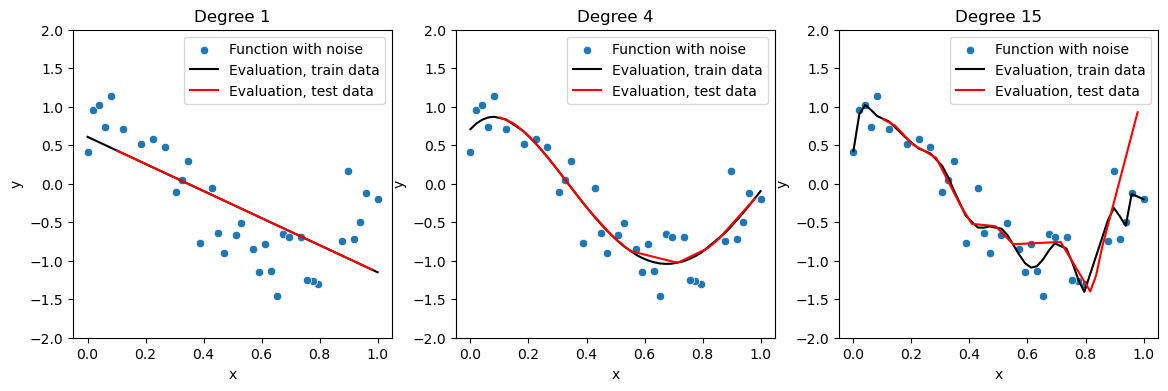

In [23]:
degrees = [1, 4, 15]
# initialize a new plot and set plot size
plt.figure(figsize=(14, 4)) 
for i in range(len(degrees)):
    # create sublots that are all on the same row
    ax = plt.subplot(1, len(degrees), i+1)
    
    # create the polynomial feature vector (or matrix)
    poly = PolynomialFeatures(degree = degrees[i], include_bias = False)
    temp_X_train = poly.fit_transform(X_train)
    temp_X_test = poly.fit_transform(X_test)
    
    # model fit
    lm = LinearRegression()
    lm.fit(temp_X_train, y_train)
    lm_yhat_train = lm.predict(temp_X_train)
    lm_yhat_test = lm.predict(temp_X_test)
    
    # plot the true function
    #sb.lineplot(np.squeeze(X_train), np.squeeze(true_function(X_train)), label="True function");
    
    # plot the true function with noise added
    sb.scatterplot(x=np.squeeze(X_train), y=y_train, label="Function with noise")
    
    # show the fitted function for the linear model using training data
    sb.lineplot(x=np.squeeze(X_train), y=lm_yhat_train, color='black', label='Evaluation, train data')
    
    sb.lineplot(x=np.squeeze(X_test), y=lm_yhat_test, color='red', label='Evaluation, test data')
    
    # add labels, title, legend to the plot
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((-.05, 1.05))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree %d" %degrees[i])

### Conclusions

The lesson here is that we are interested in the model that generalizes well. 

Clearly, the degree 1 model, while very small (only 2 parameters), doesn't fit the observed training data well. The degree 15 model fits the observed training data extremely well, but is unlikely to generalize to new (test) data.

This is a case of "over-fitting", which often happens when we try to estimate too many parameters from just a few examples. The degree 4 model appears to be a good blend of small model size and good generalization.

---
Exaplain what we did in this notebook by using the "Roadmap for building ML systems"

In [ ]:
Image(filename='./images/roadmap_ml_systems.png', width = 600)